# Now we need to track in which Department a Person held a Job. We define a Department class to create a Department table with a foreign key to link to the Person table and Job table. 

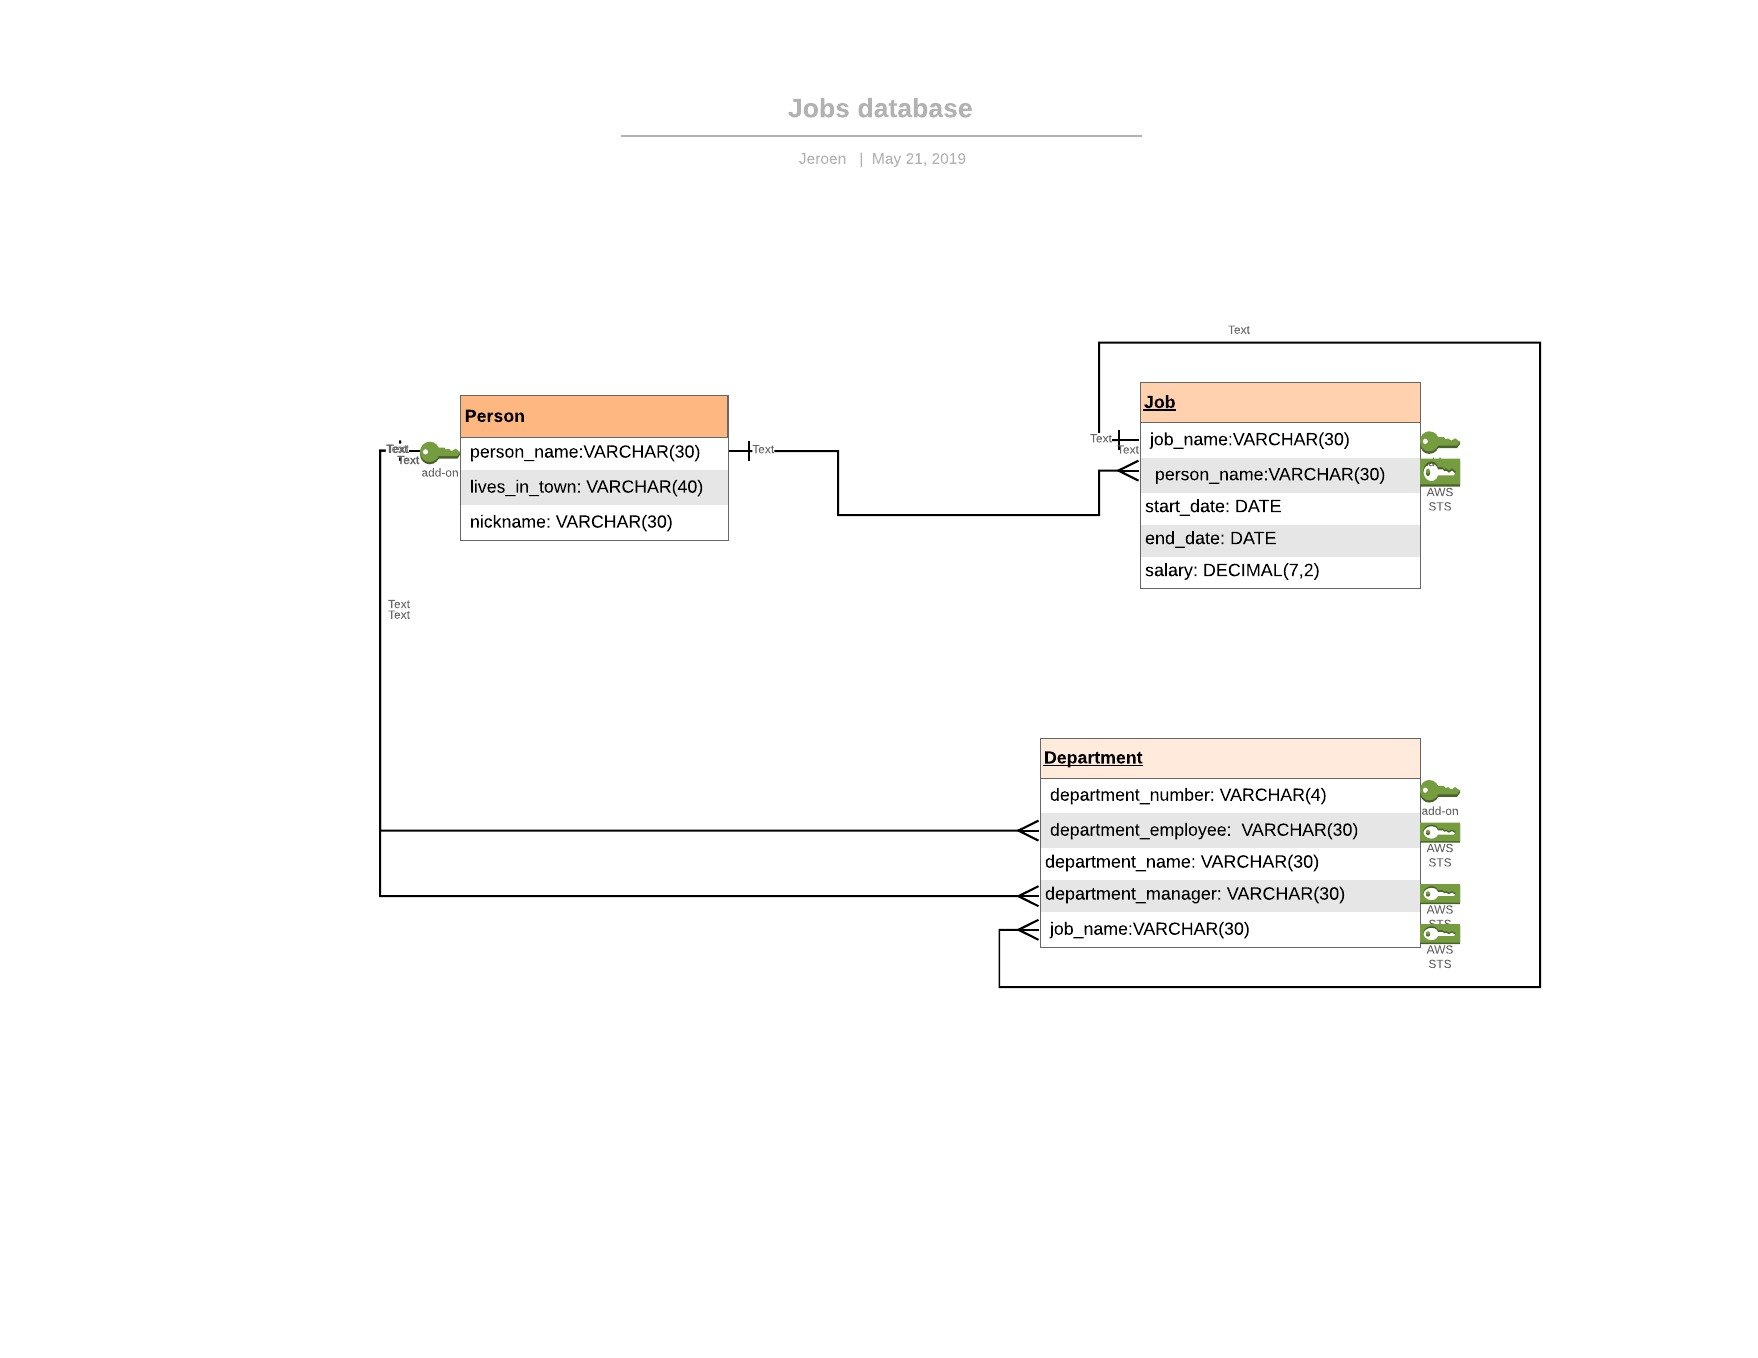

In [13]:
from IPython.display import Image
Image("Jobs database.jpeg")

In [1]:
"""
    Simple database examle with Peewee ORM, sqlite and Python
    Here we define the schema

"""
import logging
from peewee import *

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

logger.info('One off program to build the classes from the model in the database')

logger.info('Here we define our data (the schema)')
logger.info('First name and connect to a database (sqlite here)')

logger.info('The next 3 lines of code are the only database specific code')

database = SqliteDatabase('personjob.db')
database.connect()
database.execute_sql('PRAGMA foreign_keys = ON;')

logger.info('This means we can easily switch to a different database')
logger.info('Enable the Peewee magic! This base class does it all')
logger.info('By inheritance only we keep our model (almost) technology neutral')

class BaseModel(Model):
    class Meta:
        database = database


class Person(BaseModel):
    """
        This class defines Person, which maintains details of someone
        for whom we want to research career to date.
    """
    logger.info('Note how we defined the class')
    
    logger.info('Specify the fields in our model, their lengths and if mandatory')
    logger.info('Must be a unique identifier for each person')
    
    person_name = CharField(primary_key = True, max_length = 30)
    lives_in_town = CharField(max_length = 40)
    nickname = CharField(max_length = 20, null = True)

class Job(BaseModel):
    """
        This class defines Job, which maintains details of past Jobs
        held by a Person.
    """
    logger.info('Now the Job class with a similar approach')
    job_name = CharField(primary_key = True, max_length = 30)
    logger.info('Dates')
    start_date = DateField(formats = 'YYYY-MM-DD')
    end_date = DateField(formats = 'YYYY-MM-DD')
    logger.info('Number')
    
    salary = DecimalField(max_digits = 7, decimal_places = 2)
    logger.info('Which person had the Job')
    person_employed = ForeignKeyField(Person)  

class Department(BaseModel):
    """
        This class defines Department, which maintains details in which Department a Person held a Job.
    """
    logger.info('Create Department')
    department_number = CharField(primary_key = True,max_length = 4,constraints=[Check('substr(department_number,1,1) BETWEEN "A" AND "Z"')])
    logger.info('Employee')
    department_employee = ForeignKeyField(Person, related_name='was_employing', null = False)
    logger.info('Department Name')
    department_name = CharField(max_length = 30, null = False)
    logger.info('Department Manager')
    department_manager = ForeignKeyField(Person, related_name='was_managing_department', null = False)
    logger.info('Job Name')
    job_name = ForeignKeyField(Job)
    
    
    

INFO:__main__:One off program to build the classes from the model in the database
INFO:__main__:Here we define our data (the schema)
INFO:__main__:First name and connect to a database (sqlite here)
INFO:__main__:The next 3 lines of code are the only database specific code
INFO:__main__:This means we can easily switch to a different database
INFO:__main__:Enable the Peewee magic! This base class does it all
INFO:__main__:By inheritance only we keep our model (almost) technology neutral
INFO:__main__:Note how we defined the class
INFO:__main__:Specify the fields in our model, their lengths and if mandatory
INFO:__main__:Must be a unique identifier for each person
INFO:__main__:Now the Job class with a similar approach
INFO:__main__:Dates
INFO:__main__:Number
INFO:__main__:Which person had the Job
INFO:__main__:Create Department
INFO:__main__:Employee
INFO:__main__:Department Name
INFO:__main__:Department Manager
INFO:__main__:Job Name


In [2]:
from personjob_model import *
database.create_tables([Person,Job,Department])

INFO:personjob_model:One off program to build the classes from the model in the database
INFO:personjob_model:Here we define our data (the schema)
INFO:personjob_model:First name and connect to a database (sqlite here)
INFO:personjob_model:The next 3 lines of code are the only database specific code
INFO:personjob_model:This means we can easily switch to a different database
INFO:personjob_model:Enable the Peewee magic! This base class does it all
INFO:personjob_model:By inheritance only we keep our model (almost) technology neutral
INFO:personjob_model:Note how we defined the class
INFO:personjob_model:Specify the fields in our model, their lengths and if mandatory
INFO:personjob_model:Must be a unique identifier for each person
INFO:personjob_model:Now the Job class with a similar approach
INFO:personjob_model:Dates
INFO:personjob_model:Number
INFO:personjob_model:Which person had the Job
INFO:personjob_model:Create Department
INFO:personjob_model:Employee
INFO:personjob_model:Depart

# Populate the tables with data

In [3]:
"""
    Learning persistence with Peewee and sqlite
    delete the database to start over
        (but running this program does not require it)
"""
import logging
from personjob_model import *

def populate_db_PERSON():
    """
    add person data to database
    """

    logging.basicConfig(level=logging.INFO)
    logger = logging.getLogger(__name__)

    database = SqliteDatabase('personjob.db')

    logger.info('Working with Person class')
    logger.info('Note how I use constants and a list of tuples as a simple schema')
    logger.info('Normally you probably will have prompted for this from a user')

    PERSON_NAME = 0
    LIVES_IN_TOWN = 1
    NICKNAME = 2

    people = [
        ('Andrew', 'Sumner', 'Andy'),
        ('Peter', 'Seattle', 'Pete'),
        ('Susan', 'Boston', 'Beannie'),
        ('Pam', 'Coventry', 'PJ'),
        ('Steven', 'Colchester', 'Steve'),
        ]

    logger.info('Creating Person records: iterate through the list of tuples')
    logger.info('Prepare to explain any errors with exceptions')
    logger.info('and the transaction tells the database to fail on error')

    try:
        database.connect()
        database.execute_sql('PRAGMA foreign_keys = ON;')
        for person in people:
            with database.transaction():
                new_person = Person.create(
                        person_name = person[PERSON_NAME],
                        lives_in_town = person[LIVES_IN_TOWN],
                        nickname = person[NICKNAME])
                new_person.save()
                logger.info('Database add successful')

        logger.info('Print the Person records we saved...')
        for saved_person in Person:
            logger.info(f'{saved_person.person_name} lives in {saved_person.lives_in_town} ' +\
                f'and likes to be known as {saved_person.nickname}')

    except Exception as e:
        logger.info(f'Error creating = {person[PERSON_NAME]}')
        logger.info(e)
        logger.info('See how the database protects our data')

    finally:
        logger.info('database closes')
        database.close()

def populate_db_JOB():
    """
        add job data to database
    """

    logging.basicConfig(level=logging.INFO)
    logger = logging.getLogger(__name__)

    database = SqliteDatabase('personjob.db')

    logger.info('Working with Job class')
    logger.info('Creating Job records: just like Person. We use the foreign key')

    JOB_NAME = 0
    START_DATE = 1
    END_DATE = 2
    SALARY = 3
    PERSON_EMPLOYED = 4
    

    jobs = [
        ('Analyst', '2001-09-22', '2003-01-30',65500, 'Andrew'),
        ('Senior analyst', '2003-02-01', '2006-10-22', 70000, 'Andrew'),
        ('Senior business analyst', '2006-10-23', '2016-12-24', 80000, 'Andrew'),
        ('Admin supervisor', '2012-10-01', '2014-11-10', 45900, 'Peter'),
        ('Admin manager', '2014-11-14', '2018-01-05', 45900, 'Peter')
        ]


    try:
        database.connect()
        database.execute_sql('PRAGMA foreign_keys = ON;')
        for job in jobs:
            with database.transaction():
                new_job = Job.create(
                    job_name = job[JOB_NAME],
                    start_date = job[START_DATE],
                    end_date = job[END_DATE],
                    salary = job[SALARY],
                    person_employed = job[PERSON_EMPLOYED])
                new_job.save()

        logger.info('Reading and print all Job rows (note the value of person)...')
        for job in Job:
            logger.info(f'{job.job_name} : {job.start_date} to {job.end_date} for {job.person_employed}')

    except Exception as e:
        logger.info(f'Error creating = {job[JOB_NAME]}')
        logger.info(e)

    finally:
        logger.info('database closes')
        database.close()

def populate_db_DEPARTMENT():
    """
    add department data to database
    """

    logging.basicConfig(level=logging.INFO)
    logger = logging.getLogger(__name__)

    database = SqliteDatabase('personjob.db')

    logger.info('Working with Department class')
    logger.info('Note how I use constants and a list of tuples as a simple schema')
    logger.info('Normally you probably will have prompted for this from a user')

    DEPARTMENT_NUMBER = 0
    DEPARTMENT_EMPLOYEE = 1
    DEPARTMENT_NAME = 2
    DEPARTMENT_MANAGER = 3
    JOB_NAME = 4

    departments = [
        ('D1', 'Andrew', 'Design','Peter','Analyst'),
        ('D2', 'Peter', 'Building','Pam','Senior business analyst'),
        ('D3', 'Susan', 'Destruction','Andrew','Senior business analyst'),
        ('D4', 'Pam', 'Sales','Andrew','Admin supervisor'),
        ('D5', 'Steven', 'Procurement','Susan','Admin manager')
        ]

    logger.info('Creating Department records: iterate through the list of tuples')
    logger.info('Prepare to explain any errors with exceptions')
    logger.info('and the transaction tells the database to fail on error')

    try:
        database.connect()
        database.execute_sql('PRAGMA foreign_keys = ON;')
        for department in departments:
            with database.transaction():
                new_department = Department.create(
                        department_number = department[DEPARTMENT_NUMBER],
                        department_employee = department[DEPARTMENT_EMPLOYEE],
                        department_name = department[DEPARTMENT_NAME],
                        department_manager = department[DEPARTMENT_MANAGER],
                        job_name = department[JOB_NAME])
                
                new_department.save()
                logger.info('Database add successful')

        logger.info('Print the Department records we saved...')
        for saved_department in Department:
            logger.info(f'{saved_department.department_employee} works in {saved_department.department_name} ' +\
                f'which is managed by {saved_department.department_manager}')

    except Exception as e:
        logger.info(f'Error creating = {department[DEPARTMENT_NUMBER]}')
        logger.info(e)
        logger.info('See how the database protects our data')

    finally:
        logger.info('database closes')
        database.close()

if __name__ == '__main__':
    populate_db_PERSON()
    populate_db_JOB()
    populate_db_DEPARTMENT()

INFO:__main__:Working with Person class
INFO:__main__:Note how I use constants and a list of tuples as a simple schema
INFO:__main__:Normally you probably will have prompted for this from a user
INFO:__main__:Creating Person records: iterate through the list of tuples
INFO:__main__:Prepare to explain any errors with exceptions
INFO:__main__:and the transaction tells the database to fail on error
INFO:__main__:Database add successful
INFO:__main__:Database add successful
INFO:__main__:Database add successful
INFO:__main__:Database add successful
INFO:__main__:Database add successful
INFO:__main__:Print the Person records we saved...
INFO:__main__:Andrew lives in Sumner and likes to be known as Andy
INFO:__main__:Peter lives in Seattle and likes to be known as Pete
INFO:__main__:Susan lives in Boston and likes to be known as Beannie
INFO:__main__:Pam lives in Coventry and likes to be known as PJ
INFO:__main__:Steven lives in Colchester and likes to be known as Steve
INFO:__main__:databas

# Now we need to track in which Department a Person held a Job. For a Department, we need to know it's department number, which is 4 characters long and start with a letter. We need to know the department name (30 characters), and the name of the department manager (30 characters). We also need to know the duration in days that the job was held. 

In [8]:
from personjob_model import *
from datetime import datetime
import pandas as pd

import logging

def join_classes():
    logging.basicConfig(level=logging.INFO)
    logger = logging.getLogger(__name__)

    database = SqliteDatabase('work.db')

#     logger.info('Working with Job class')

    try:
        database.connect()
        database.execute_sql('PRAGMA foreign_keys = ON;')
        query = (Person
                 .select(Person.person_name, Department,Job)
                 .join(Department, on =(Department.department_employee)) 
                 .switch(Person)
                 .join(Job)

                )

        for person in query:
            working_days = (pd.to_datetime(person.job.end_date)-pd.to_datetime(person.job.start_date)).days
            job = person.job.job_name
            print(person.person_name,'worked ', working_days, ' days as a ',job,' in the ', person.department.department_name, 'department, which has number ',person.department.department_number, ' and is managed by ',person.department.department_manager)
    except Exception as e:
        logger.info('Error')
        logger.info(e)

    finally:
        logger.info('database closes')
        database.close()

if __name__ == '__main__':
    join_classes()

INFO:__main__:database closes


Andrew worked  495  days as a  Analyst  in the  Design department, which has number  D1  and is managed by  Peter
Andrew worked  1359  days as a  Senior analyst  in the  Design department, which has number  D1  and is managed by  Peter
Andrew worked  3715  days as a  Senior business analyst  in the  Design department, which has number  D1  and is managed by  Peter
Peter worked  770  days as a  Admin supervisor  in the  Building department, which has number  D2  and is managed by  Pam
Peter worked  1148  days as a  Admin manager  in the  Building department, which has number  D2  and is managed by  Pam
